In [1]:
import pandas as pd
data=pd.read_csv('./data/percent-bachelors-degrees-women-usa.csv')
print(data.columns)
#print(data[:2])
print(data.describe)

Index(['Year', 'Agriculture', 'Architecture', 'Art and Performance', 'Biology',
       'Business', 'Communications and Journalism', 'Computer Science',
       'Education', 'Engineering', 'English', 'Foreign Languages',
       'Health Professions', 'Math and Statistics', 'Physical Sciences',
       'Psychology', 'Public Administration', 'Social Sciences and History'],
      dtype='object')
<bound method NDFrame.describe of     Year  Agriculture  Architecture  Art and Performance    Biology  \
0   1970     4.229798     11.921005                 59.7  29.088363   
1   1971     5.452797     12.003106                 59.9  29.394403   
2   1972     7.420710     13.214594                 60.4  29.810221   
3   1973     9.653602     14.791613                 60.2  31.147915   
4   1974    14.074623     17.444688                 61.9  32.996183   
5   1975    18.333162     19.134048                 60.9  34.449902   
6   1976    22.252760     21.394491                 61.3  36.072871   
7   19

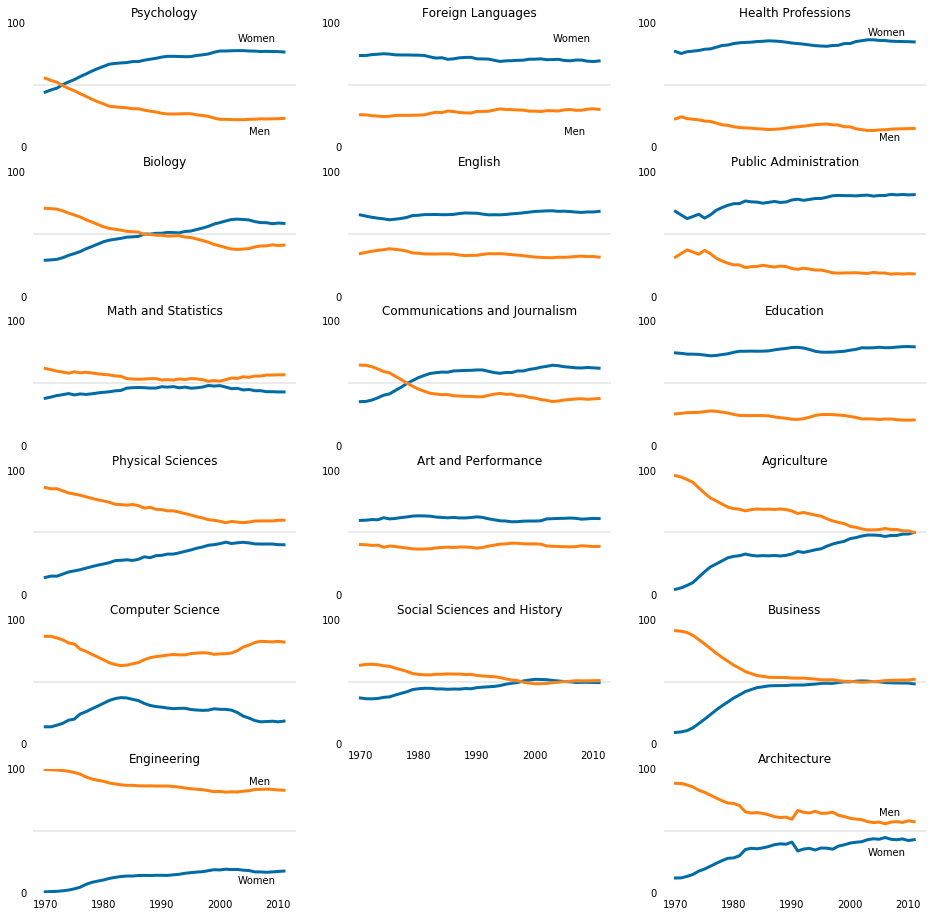

In [2]:
def decorateAxes(axes):
    for key,spine in axes.spines.items():
        spine.set_visible(False)
    axes.set_ylim(0, 100)
    axes.set_yticks([0,100])
    axes.axhline(y=50,c=(171/255, 171/255, 171/255),alpha=0.3)
    axes.tick_params(left='off',right='off',top='off',bottom='off',labelbottom='off')

def plotCharts(axes,sub_cats,index):
    axes.plot(data['Year'],data[sub_cats[index]],c=cb_dark_blue,label='Women',linewidth=3)
    axes.plot(data['Year'],100-data[sub_cats[index]],c=cb_orange,label='Men',linewidth=3)
    for key,spine in axes.spines.items():
        spine.set_visible(False)
    axes.set_title(sub_cats[index])
    decorateAxes(axes)
    if index==(len(sub_cats)-1):
        axes.tick_params(labelbottom='on')


import matplotlib.pyplot as plt
%matplotlib inline

#Group degrees into three category.
sc_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

fig=plt.figure(figsize=(16,16))
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)


for i in range(1,17,3):

    #Generate first column in line charts.Science degrees.
    sc_cats_index=int(i/3)
    ax=fig.add_subplot(6,3,i)
    plotCharts(ax,sc_cats,sc_cats_index)
    if i==1:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    if i==16:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')

    #Generate second column in line charts.Liberal arts degrees.
    t=i+1
    if t<15:
        lib_arts_cats_index=int(t/3)
        ax2=fig.add_subplot(6,3,t)
        plotCharts(ax2,lib_arts_cats,lib_arts_cats_index)
        if t==2:
            ax2.text(2003, 85, 'Women')
            ax2.text(2005, 10, 'Men')
    #Generate third column in line charts.Other degrees.   
    r=i+2
    other_cats_index=int((r-1)/3)
    ax3=fig.add_subplot(6,3,r)
    plotCharts(ax3,other_cats,other_cats_index)
    if r==3:
        ax3.text(2003, 90, 'Women')
        ax3.text(2005, 5, 'Men')
    if r==18:
        ax3.text(2005, 62, 'Men')
        ax3.text(2003, 30, 'Women')